In [ ]:
# Adapted from PS3 code 

import numpy as np
from PIL import Image
import cv2, os
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
import skimage


def normalize(mag):
    mag = mag / 1.5
    mag = mag * 255.
    mag = np.clip(mag, 0, 255)
    mag = mag.astype(np.uint8)
    return mag

N_THRESHOLDS = 99

def detect_edges(image_path, fn):
  """
  Detects edges in every image in the image list.
  
  :param imlist: a list of filenames.
  :param fn: an edge detection function.
  
  return: (list of image arrays, list of edge arrays). Edge array is of the same size as the image array.
  """  
  edges = []
  count=0

  I = cv2.imread(image_path)
  I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
  I = I.astype(np.float32)/255.
  mag = fn(I)
  edges.append(mag)
  return I, edges

def compute_edges_dxdy_smoothing(I):
  """
  Returns the norm of dx and dy as the edge response function.
  
  :param I: image array
  
  return: edge array, which is a HxW numpy array
  """

  """ Copy over your response from part a and alter it to include this answer. See cv2.GaussianBlur"""
  # ADD YOUR CODE HERE

  dx = signal.convolve2d(cv2.GaussianBlur(I,(5,5),1),np.array([[-1, 0, 1]]),boundary='symm', mode='same')
  dy = signal.convolve2d(cv2.GaussianBlur(I,(5,5),1),np.array([[-1, 0, 1]]).T,boundary='symm', mode='same')

  

  mag = np.sqrt(dx**2 + dy**2)
  mag = normalize(mag)
  return mag


def compute_edges_dxdy_nonmax(I):
    """ Copy over your response from part b and alter it
    to include this response"""
    # ADD CODE HERE
    I = cv2.GaussianBlur(I, (5, 5), 0.5)
    dx = signal.convolve2d(I, np.array([[-1, 0, 1]]), mode='same', boundary='symm')
    dy = signal.convolve2d(I, np.array([[-1, 0, 1]]).T, mode='same', boundary='symm')
    mag = np.sqrt(dx**2 + dy**2)
    mag = normalize(mag)
    # ADD YOUR CODE HERE
    non_max_mag = np.zeros(mag.shape, dtype= np.uint8)
    theta = np.arctan2(dy, dx)
    all_angles = np.abs(np.rad2deg(theta))
    for i in range(1, mag.shape[0]-1):
        for j in range(1, mag.shape[1]-1):
            angle = all_angles[i, j]
        cases = {0 : (0, 1), 45 : (1, -1), 90 : (1, 0), 135 : (1, -1)}
        x, y = 0., 0.
        for case, (iinc, jinc) in cases.items():
            upper_thresh = case + 22.5
            lower_thresh = case - 22.5
    if lower_thresh < 0:
        lower_thresh = 180 - 22.5
    if lower_thresh <= angle < upper_thresh:
        x = mag[i + iinc, j + jinc]
        y = mag[i - iinc, j - jinc]
    # Non-max Suppression
    if (mag[i,j] >= x) and (mag[i,j] >= y):
        non_max_mag[i,j] = mag[i,j]
    else:
        non_max_mag[i,j] = 0

    return non_max_mag




In [ ]:
# !unzip -j /content/drive/MyDrive/585_data/celebA.zip -d "/content/drive/My Drive/585_data/celebA/" | head -10
# !unzip  /content/drive/MyDrive/585_data/celebA.zip -d "/content/drive/My Drive/585_data/celebA/"

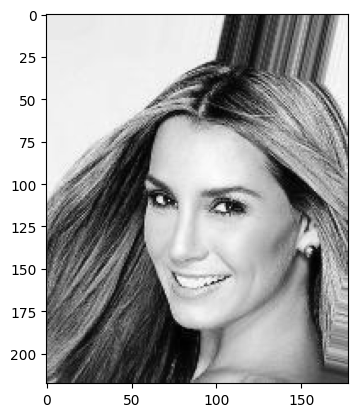

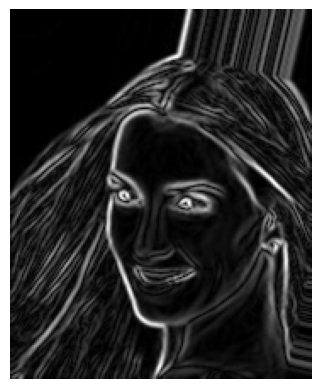

In [ ]:
import cv2
dataroot="/content/drive/My Drive/585_data/celebA/"
img_folder = os.path.join(dataroot)
img_filenames = sorted(os.listdir(img_folder))

image_num=img_filenames[0]

image=img_folder +image_num

fn = compute_edges_dxdy_smoothing
# fn = compute_edges_dxdy_nonmax
image, edges = detect_edges(image, fn)
edge_map = edges[0]

plt.imshow(image,cmap='gray')
plt.show()
edge_map = edges[0]  # extract the edge map from the array

plt.imshow(edge_map, cmap='gray')  # plot the edge map as grayscale image
plt.axis('off')  # turn off axis labels
plt.show()  # display the image


In [ ]:
import cv2
import os
dataroot="/content/drive/My Drive/585_data/celebA/img_align_celeba/"
img_folder = os.path.join(dataroot)
img_filenames = sorted(os.listdir(img_folder))
fn = compute_edges_dxdy_smoothing
count=1
for img in img_filenames:
  image, edges = detect_edges(img_folder+img, fn)
  edge_map = edges[0]
  edge_map_gray = cv2.cvtColor(edge_map, cv2.COLOR_GRAY2RGB)
  cv2.imwrite("/content/drive/My Drive/585_data/celebAcontours/"+str(count)+".jpg", edge_map_gray)
  # print("/content/drive/My Drive/585_data/celebAcontours/"+"edge_map"+str(count)+".jpg")
  count+=1

print(count)


TypeError: ignored

In [ ]:
# dataroot='/content/drive/MyDrive/585_data/celebA/img_align_celeba/'
dataroot='/content/drive/MyDrive/585_data/celebAcontours/'

gt_filenames = sorted(os.listdir(dataroot))
print(len(gt_filenames))

6241
